In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import math

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

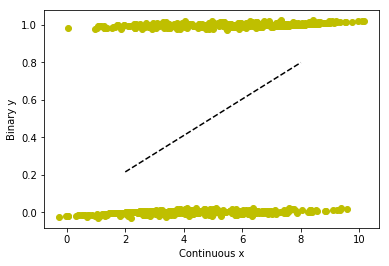

In [3]:
# Set the random seed
np.random.seed(seed=456613)

# Create some data
df = pd.DataFrame()
for probs in list(range(2, 9)):
    tmp = pd.DataFrame({
        'y': np.random.binomial(1, probs / 10, size=(1, 100))[0],
        'x': probs
    })
    df = df.append(tmp)

# Continuous predictor
x = df['x']

# Binary outcome
bin_y = df['y']

# Calculate linear regression for x and bin_y
fit = np.polyfit(x, bin_y, 1)

# Work as a function to return the predicted value of y
fit_fn = np.poly1d(fit)

# Add a little 'noise' to the data for graphing purposes
jitter = np.random.randn(700)

# display our results
plt.plot(x + jitter, bin_y + jitter / 100, 'yo', x, fit_fn(x), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Binary y')
plt.show()


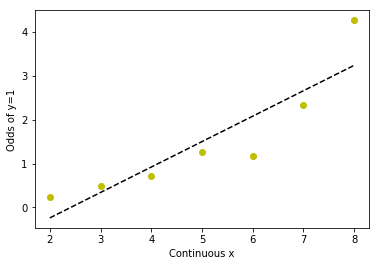

In [4]:
# Unique values in x
xvals = x.unique()

# Calculate and store the odds
yodds = []
for xi in xvals:
    y1_ct = bin_y[x == xi].sum() # The number of trials y = 1
    y0_ct = len(bin_y[x == xi]) - y1_ct # The number of trials y = 0
    yodds.append(y1_ct / y0_ct) # odds of getting y = 1 for xi
    
# Calculate linear regression for x and y odds
fit = np.polyfit(xvals, yodds, 1)

# Work as a function to return the predicted value of yodds
fit_fn = np.poly1d(fit)

# Display our work
plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

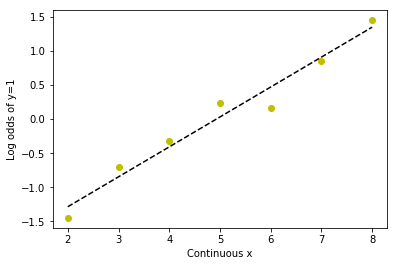

In [5]:
# Natural log of the odds
ln_yodds = np.log(yodds)

# Calcualte linear regression for x and yodds
fit = np.polyfit(xvals, ln_yodds, 1)

# Works as a function to return the predicted vlaue of yodds
fit_fn = np.poly1d(fit)

# Display
plt.plot(xvals, ln_yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Log odds of y=1')

plt.show()

# TLDS

Imagine you ran a binary logistic regression predicting likelihood of developing a hearing problem, using age in years and male (0=female, 1=male) as predictors. Your final model looks like this:

logit(HasHearingProblem)=−1+.02∗age+1∗male
 
Write out a description of the effects that age and gender have on the odds of developing hearing problems in terms a layperson could understand. Include estimates for the odds of hearing problems in a 95 year old woman and a 50 year old man. Discuss your interpretation with your mentor.




In [11]:
print(math.exp(.02))
print(math.exp(.02*10))
print(math.exp(.02*100))

1.0202013400267558
1.2214027581601699
7.38905609893065


In [7]:
print(math.exp(1))

2.718281828459045


In [13]:
odds_95_female = math.exp(-1 + .02*95 + 0)
print('The 95 year old female has {:.2f} odds of a hearing problem'.format(odds_95_female))

odds_50_male = math.exp(-1 + .02*50 + 1)
print('The 50 year old male has {:.2f} odds of a hearing problem'.format(odds_50_male))

The 95 year old female has 2.46 odds of a hearing problem
The 50 year old male has 2.72 odds of a hearing problem


The odds of a hearing problem are higher for males than females.  Being male increases the odds of hearing loss by a factor of 2.72.  The odds of hearing problems also increases by age.  This increases by e^(.02*age).  A 50 year old male has odds of hearing problems than a 95 year old woman.  

Try fitting a binary logistic model.  Use a dataset predicting university admission based on GPA, GRE, and school ranking.  Start using GPA and GRE variables

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


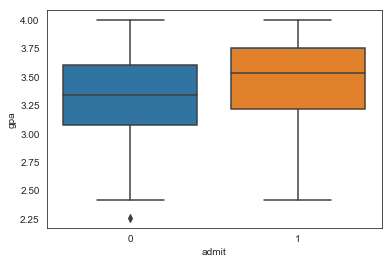

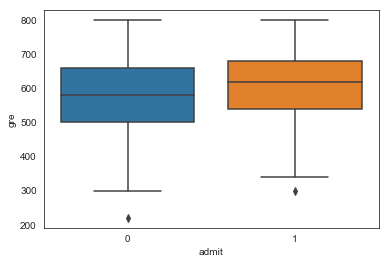

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


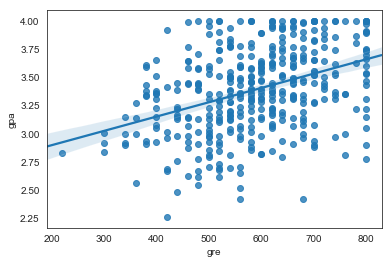

In [7]:
# Read in the data
df = pd.read_csv('https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1')

# Look at the data
print(df.head())

# Set plotting style
sns.set_style('white')

# Bivariate relationships of predictors to admissions outcome
sns.boxplot(x='admit', y='gpa', data=df)
plt.show()
sns.boxplot(x='admit', y='gre', data=df)
plt.show()

# Relationship between predictors
sns.regplot(x='gre', y='gpa', data=df)
plt.show()


In [8]:
# Declare predictors
X_statsmod = df[['gre', 'gpa']]

# The statsmodels formulation requires a column with a constant value 1
# that will act as teh intercept
X_statsmod['intercept'] = 1

# Declare and fit the model
logit = sm.Logit(df['admit'], X_statsmod)
result = logit.fit()

# Lots of information about hte model and its coefficients, but the
# accuracy rate for predictions is missing
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.600430
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Sat, 01 Dec 2018   Pseudo R-squ.:                 0.03927
Time:                        12:53:06   Log-Likelihood:                -240.17
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 5.456e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0027      0.001      2.544      0.011       0.001       0.005
gpa            0.7547      0.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# Calculate accuracy. First, get probability that each row will be admitted
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table
table = pd.crosstab(df['admit'], pred_y_statsmod)

print('\n Accuracy by admission status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0, 0] + table.iloc[1,1]) / table.sum().sum())


 Accuracy by admission status
col_0    0   1
admit         
0      263  10
1      118   9

 Percentage accuracy
0.68


In [11]:
# Declare a logistic regression classifier
# Parameter regularization coefficient C described above
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gpa', 'gre']]

# Fit the model
fit = lr.fit(X, y)

# Display
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[0.74747563 0.00267019]]
[-4.91157158]

 Accuracy by admission status
admit    0    1
row_0          
0      263  118
1       10    9

 Percentage accuracy
0.68


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
# Grid search from datacamp lesson

X = df[['gre', 'gpa', 'rank']]

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 1000)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 1.0544427935261684}
Best score is 0.7175


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
pred_y_logreg_cv = logreg_cv.predict(X)
print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_logreg_cv, y))

print('\n Percentage accuracy')
print(logreg_cv.score(X, y))


 Accuracy by admission status
admit    0    1
row_0          
0      257  100
1       16   27

 Percentage accuracy
0.71


In [36]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(solver='liblinear', C=1))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set
logreg_scaled = pipeline.fit(X, y)

# Instantiate and fit a classifier to the unscaled data
logreg_unscaled = LogisticRegression(solver='liblinear', C=1).fit(X, y)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(logreg_scaled.score(X, y)))
print('Accuracy without Scaling: {}'.format(logreg_unscaled.score(X, y)))


Accuracy with Scaling: 0.705
Accuracy without Scaling: 0.71


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
